In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LinearRegression, SGDRegressor

In [2]:
df = pd.read_csv('df_after_cleaning.csv').drop(['Unnamed: 0', 'source'], axis=1)
df

,postcode,house_is,property_subtype,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,...,land_surface,facades_number,swimming_pool_has,region,building_state_agg,postcode_median_price,building_state_median_price,property_subtype_median_price,building_property_subtype_median_facades,property_subtype_median_facades
0,4180,True,MIXED_USE_BUILDING,295000.0,3.0,242.0,True,False,False,True,...,1403.0,NaN,False,W,good,229000.0,320000.0,310000.0,2.0,2.0
1,8730,True,VILLA,675000.0,4.0,349.0,True,False,False,False,...,1526.0,NaN,False,F,good,241000.0,320000.0,540000.0,4.0,4.0
2,4020,True,APARTMENT_BLOCK,250000.0,5.0,303.0,True,False,False,False,...,760.0,NaN,False,W,to_renovate,195000.0,230000.0,357500.0,NaN,NaN
3,1200,True,HOUSE,545000.0,4.0,235.0,True,True,False,False,...,63.0,NaN,False,B,renovated,445000.0,310000.0,288000.0,3.0,3.0
4,1190,True,MIXED_USE_BUILDING,500000.0,2.0,220.0,True,False,False,False,...,193.0,NaN,False,B,good,360000.0,320000.0,310000.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10048,4000,False,APARTMENT,245000.0,2.0,103.0,False,False,False,True,...,0.0,2.0,False,W,good,225000.0,320000.0,282500.0,2.0,2.0
10049,8790,False,APARTMENT,250000.0,1.0,300.0,False,False,False,False,...,0.0,2.0,False,F,good,257000.0,320000.0,282500.0,2.0,2.0
10050,2018,False,APARTMENT,298000.0,1.0,71.0,True,False,False,True,...,0.0,1.0,False,F,good,443475.0,320000.0,282500.0,2.0,2.0
10051,2000,False,FLAT_STUDIO,150000.0,1.0,40.0,True,False,False,False,...,0.0,2.0,False,F,to_renovate,497000.0,230000.0,149000.0,2.0,2.0


In [3]:
df.dtypes

postcode                                      int64
house_is                                       bool
property_subtype                             object
price                                       float64
rooms_number                                float64
area                                        float64
equipped_kitchen_has                           bool
furnished                                      bool
open_fire                                      bool
terrace                                        bool
terrace_area                                float64
garden                                         bool
garden_area                                 float64
land_surface                                float64
facades_number                              float64
swimming_pool_has                              bool
region                                       object
building_state_agg                           object
postcode_median_price                       float64
building_sta

In [4]:
# keeping only numerical features for this test
features_to_delete = ['postcode', 'house_is', 'property_subtype', 'equipped_kitchen_has', 'furnished', 'open_fire', 'terrace', 'terrace_area', 'garden', 'garden_area', 'facades_number', 'swimming_pool_has', 'region', 'building_state_agg']
df.drop(features_to_delete, axis=1, inplace=True)
df

,price,rooms_number,area,land_surface,postcode_median_price,building_state_median_price,property_subtype_median_price,building_property_subtype_median_facades,property_subtype_median_facades
0,295000.0,3.0,242.0,1403.0,229000.0,320000.0,310000.0,2.0,2.0
1,675000.0,4.0,349.0,1526.0,241000.0,320000.0,540000.0,4.0,4.0
2,250000.0,5.0,303.0,760.0,195000.0,230000.0,357500.0,NaN,NaN
3,545000.0,4.0,235.0,63.0,445000.0,310000.0,288000.0,3.0,3.0
4,500000.0,2.0,220.0,193.0,360000.0,320000.0,310000.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
10048,245000.0,2.0,103.0,0.0,225000.0,320000.0,282500.0,2.0,2.0
10049,250000.0,1.0,300.0,0.0,257000.0,320000.0,282500.0,2.0,2.0
10050,298000.0,1.0,71.0,0.0,443475.0,320000.0,282500.0,2.0,2.0
10051,150000.0,1.0,40.0,0.0,497000.0,230000.0,149000.0,2.0,2.0


In [5]:
df.dropna(axis=0, inplace=True)
df

,price,rooms_number,area,land_surface,postcode_median_price,building_state_median_price,property_subtype_median_price,building_property_subtype_median_facades,property_subtype_median_facades
0,295000.0,3.0,242.0,1403.0,229000.0,320000.0,310000.0,2.0,2.0
1,675000.0,4.0,349.0,1526.0,241000.0,320000.0,540000.0,4.0,4.0
3,545000.0,4.0,235.0,63.0,445000.0,310000.0,288000.0,3.0,3.0
4,500000.0,2.0,220.0,193.0,360000.0,320000.0,310000.0,2.0,2.0
5,189000.0,3.0,200.0,100.0,229000.0,230000.0,288000.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...
10048,245000.0,2.0,103.0,0.0,225000.0,320000.0,282500.0,2.0,2.0
10049,250000.0,1.0,300.0,0.0,257000.0,320000.0,282500.0,2.0,2.0
10050,298000.0,1.0,71.0,0.0,443475.0,320000.0,282500.0,2.0,2.0
10051,150000.0,1.0,40.0,0.0,497000.0,230000.0,149000.0,2.0,2.0


In [6]:
np.random.seed(4444)
X = df.loc[:, df.columns != 'price'].to_numpy()
y = df['price'].to_numpy()
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

In [7]:
X, y

(array([[3.000e+00, 1.250e+02, 2.980e+02, ..., 2.880e+05, 3.000e+00,
         3.000e+00],
        [2.000e+00, 1.150e+02, 0.000e+00, ..., 2.825e+05, 2.000e+00,
         2.000e+00],
        [2.000e+00, 1.200e+02, 0.000e+00, ..., 2.825e+05, 2.000e+00,
         2.000e+00],
        ...,
        [1.000e+00, 5.400e+01, 0.000e+00, ..., 2.825e+05, 2.000e+00,
         2.000e+00],
        [6.000e+00, 4.600e+02, 2.045e+03, ..., 2.880e+05, 3.000e+00,
         3.000e+00],
        [3.000e+00, 1.890e+02, 4.470e+02, ..., 2.880e+05, 3.000e+00,
         3.000e+00]]),
 array([214000., 418000., 399000., ..., 119000., 500000., 430000.]))

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.619517479284938

In [12]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X, y)

SGDRegressor()

In [22]:
sgd_reg.score(X, y)

-5.009023332275236e+27

In [7]:
param_range = np.arange(1,1001)
train_scores, valid_scores = validation_curve(sgd_reg, X, y, param_name="max_iter", param_range=param_range, cv=3)

/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1240, in fit
    return self._fit(X, y, alpha=self.alpha, C=1.0,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1202, in _fit
    self._partial_fit(X, y, alpha, C, loss, learning_rate,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1129, in _partial_fit
    X, y = self._validate_data(X, y, accept_sparse="csr", copy=False,
  File "/home/jo/an

/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1240, in fit
    return self._fit(X, y, alpha=self.alpha, C=1.0,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1202, in _fit
    self._partial_fit(X, y, alpha, C, loss, learning_rate,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1129, in _partial_fit
    X, y = self._validate_data(X, y, accept_sparse="csr", copy=False,
  File "/home/jo/an

/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1240, in fit
    return self._fit(X, y, alpha=self.alpha, C=1.0,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1202, in _fit
    self._partial_fit(X, y, alpha, C, loss, learning_rate,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1129, in _partial_fit
    X, y = self._validate_data(X, y, accept_sparse="csr", copy=False,
  File "/home/jo/an

/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1240, in fit
    return self._fit(X, y, alpha=self.alpha, C=1.0,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1202, in _fit
    self._partial_fit(X, y, alpha, C, loss, learning_rate,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1129, in _partial_fit
    X, y = self._validate_data(X, y, accept_sparse="csr", copy=False,
  File "/home/jo/an

/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1240, in fit
    return self._fit(X, y, alpha=self.alpha, C=1.0,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1202, in _fit
    self._partial_fit(X, y, alpha, C, loss, learning_rate,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1129, in _partial_fit
    X, y = self._validate_data(X, y, accept_sparse="csr", copy=False,
  File "/home/jo/an

/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1240, in fit
    return self._fit(X, y, alpha=self.alpha, C=1.0,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1202, in _fit
    self._partial_fit(X, y, alpha, C, loss, learning_rate,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1129, in _partial_fit
    X, y = self._validate_data(X, y, accept_sparse="csr", copy=False,
  File "/home/jo/an

/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1240, in fit
    return self._fit(X, y, alpha=self.alpha, C=1.0,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1202, in _fit
    self._partial_fit(X, y, alpha, C, loss, learning_rate,
  File "/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1129, in _partial_fit
    X, y = self._validate_data(X, y, accept_sparse="csr", copy=False,
  File "/home/jo/an

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
train_scores

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

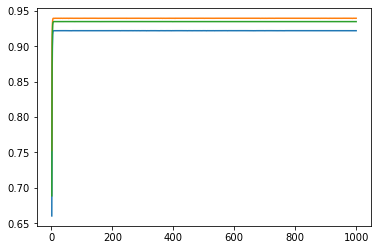

In [6]:
plt.plot(param_range, train_scores)

In [7]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

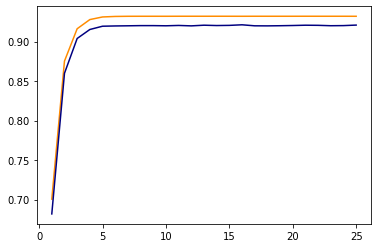

In [8]:
plt.plot(param_range[0:25], train_scores_mean[0:25], color="darkorange")
plt.plot(param_range[0:25], valid_scores_mean[0:25], color="navy")

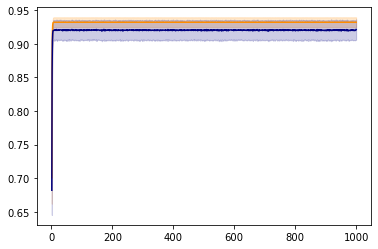

In [10]:
plt.plot(param_range, train_scores_mean, color="darkorange")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(param_range, valid_scores_mean, color="navy")
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy")